# SENSEX Index prediction using LSTM Model

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=16,8
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

### Import Datasets

In [8]:
sensex = pd.read_csv("Dataset/sensex.csv")

In [9]:
sensex.head()

,Date,Open,High,Low,Close
0,01-01-1996,3114.08,3127.94,3114.08,3127.94
1,02-01-1996,3130.16,3131.37,3108.14,3111.96
2,03-01-1996,3114.08,3114.83,3086.53,3088.40
3,04-01-1996,3088.86,3088.86,3049.55,3072.41
4,05-01-1996,3067.56,3067.56,3041.82,3048.86


In [22]:
data=sensex.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(sensex)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.head()

,Date,Close
0,01-01-1996,3127.94
1,02-01-1996,3111.96
2,03-01-1996,3088.4
3,04-01-1996,3072.41
4,05-01-1996,3048.86


In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset['Date']
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:5000,:]
valid_data=final_dataset[5000:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
print(scaled_data)

[[0.01065141]
 [0.01032893]
 [0.00985349]
 ...
 [0.92714878]
 [0.93238791]
 [0.93296002]]


In [16]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

Epoch 1/1
 - 284s - loss: 1.7986e-04


In [17]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [24]:
print(predicted_closing_price)

[[23955.252]
 [23898.371]
 [23710.918]
 ...
 [47109.49 ]
 [46867.246]
 [46900.07 ]]


C:\Users\Sarthak Agarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


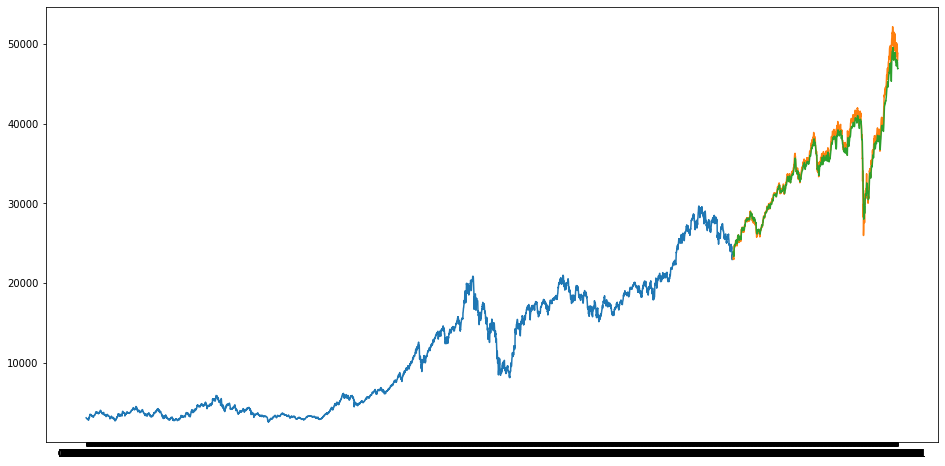

In [19]:
train_data=new_dataset[:5000]
valid_data=new_dataset[5000:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])